In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

main_experiments_path = "../experiments"


basic_method_names = [
    "svr",
    "pls",
    "gradboost",
    "mlp_0.01",
    "mlp_0.001",
    "mlp_0.0001",
    "rbf_full_0.01",
    "rbf_full_0.001",
    "rbf_full_0.0001",
    "rbf_diag_0.01",
    "rbf_diag_0.001",
    "rbf_diag_0.0001",
    "rbf_scal_0.01",
    "rbf_scal_0.001",
    "rbf_scal_0.0001",
    "rbf_univ_0.01",
    "rbf_univ_0.001",
    "rbf_univ_0.0001",
    "ffn_0.1_0.01",
    "ffn_0.1_0.001",
    "ffn_0.1_0.0001",
    "ffn_1_0.01",
    "ffn_1_0.001",
    "ffn_1_0.0001",
    "ffn_10_0.01",
    "ffn_10_0.001",
    "ffn_10_0.0001",
    "uffn_0.1_0.01",
    "uffn_0.1_0.001",
    "uffn_0.1_0.0001",
    "uffn_1_0.01",
    "uffn_1_0.001",
    "uffn_1_0.0001",
    "uffn_10_0.01",
    "uffn_10_0.001",
    "uffn_10_0.0001",
]


basic_condensed_method_names = [
    "svr",
    "pls",
    "gradboost",
    "mlp",
    "rbf_full",
    "rbf_diag",
    "rbf_scal",
    "rbf_univ",
    "ffn",
    "uffn",
]

method_names = []
condensed_method_names = []
for i in range(4):
    method_names += [str(i+1)+"_"+method for method in basic_method_names]
    condensed_method_names += [str(i+1)+"_"+method for method in basic_condensed_method_names]


experiments_df = pd.DataFrame()


method_settings = os.listdir(main_experiments_path)

# sort by name

method_settings = sorted(method_settings)

#print all folders in the main experiments path
for method_setting in method_settings:
    #print(method_setting)
    # iterate over repetitions

    experiment_df = pd.DataFrame()

    if method_setting.startswith("."):
        continue

    for repetition in os.listdir(main_experiments_path + "/" + method_setting):
        #print(repetition)
        # iterate over files

        if repetition.startswith("."):
            continue

        ## add this repetition to the experiment df as column
        experiment_df[repetition] = None

        try:
            ## read the npy file
            train_loss = np.load(main_experiments_path + "/" + method_setting + "/" + repetition + "/data/" + "train_loss.npy")
            val_loss = np.load(main_experiments_path + "/" + method_setting + "/" + repetition +  "/data/"  + "val_loss.npy")
            test_loss = np.load(main_experiments_path + "/" + method_setting + "/" + repetition + "/data/" + "test_loss.npy")
        except Exception as e:
            print("Error reading files for dataset: ", method_setting, e)
            continue
        
        ### extract the min val loss and pick the corresponding test loss

        min_val_loss = np.min(val_loss)
        min_val_loss_index = np.argmin(val_loss)

        min_test_loss = test_loss[min_val_loss_index]

    
        ## add the test loss to the experiment df
        experiment_df.loc["data",repetition] = min_test_loss

    print(experiment_df)

    ## order by dataset name
    experiment_df = experiment_df.sort_index()

    ## add a column which represents the mean of all repetitions
    experiment_df["mean"] = experiment_df.mean(axis=1)

    ## set mean to nan if there are any nans in the row
    experiment_df.loc[experiment_df.isnull().any(axis=1), "mean"] = np.nan

    ## add the experiment df to the experiments df
    experiments_df[method_setting] = experiment_df["mean"]


for i, method_name in enumerate(method_names):
    ## rename column experiment_000001 to method_names[0]
    exp_name = "experiment_" + str(i+1).zfill(6)
    experiments_df = experiments_df.rename(columns={exp_name: method_name})

experiments_df



     repetition_000003 repetition_000004 repetition_000005 repetition_000002  \
data       1074.418861       1072.545907       1371.594445       1327.221047   

     repetition_000007 repetition_000000 repetition_000001 repetition_000006  
data       1078.534112       1303.534984        2252.32982       1041.674221  
     repetition_000003 repetition_000004 repetition_000005 repetition_000002  \
data       1068.481151       1097.729563        1390.95716       1490.601948   

     repetition_000007 repetition_000000 repetition_000001 repetition_000006  
data       1133.851144       1367.672497       2209.868396       1042.171045  
     repetition_000003 repetition_000004 repetition_000005 repetition_000002  \
data         515.43123        417.044783         409.73051        416.089905   

     repetition_000007 repetition_000000 repetition_000001 repetition_000006  
data         597.63414        604.692124        999.921938        494.121334  
     repetition_000003 repetition_000004 re

/var/folders/vx/2hn3fq3j01ndcrt24ck57sr80000gn/T/ipykernel_53160/1983186819.py:130: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  experiments_df[method_setting] = experiment_df["mean"]
/var/folders/vx/2hn3fq3j01ndcrt24ck57sr80000gn/T/ipykernel_53160/1983186819.py:130: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  experiments_df[method_setting] = experiment_df["mean"]
/var/folders/vx/2hn3fq3j01ndcrt24ck57sr80000gn/T/ipykernel_53160/1983186819.py:130: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

     repetition_000003 repetition_000004 repetition_000005 repetition_000002  \
data       1073.136841        851.263306       1232.582642       1184.797852   

     repetition_000007 repetition_000000 repetition_000001 repetition_000006  
data        1125.00708       1163.863892       1763.900635       1142.131592  
     repetition_000003 repetition_000004 repetition_000005 repetition_000002  \
data       1074.418861       1072.545907       1371.594445       1327.221047   

     repetition_000007 repetition_000000 repetition_000001 repetition_000006  
data       1078.534112       1303.534984        2252.32982       1041.674221  
     repetition_000003 repetition_000004 repetition_000005 repetition_000002  \
data       1068.481151       1097.729563        1390.95716       1490.601948   

     repetition_000007 repetition_000000 repetition_000001 repetition_000006  
data       1133.851144       1367.672497       2209.868396       1042.171045  
     repetition_000003 repetition_000004 re

/var/folders/vx/2hn3fq3j01ndcrt24ck57sr80000gn/T/ipykernel_53160/1983186819.py:130: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  experiments_df[method_setting] = experiment_df["mean"]
/var/folders/vx/2hn3fq3j01ndcrt24ck57sr80000gn/T/ipykernel_53160/1983186819.py:130: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  experiments_df[method_setting] = experiment_df["mean"]
/var/folders/vx/2hn3fq3j01ndcrt24ck57sr80000gn/T/ipykernel_53160/1983186819.py:130: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

     repetition_000003 repetition_000004 repetition_000005 repetition_000002  \
data        1054.94397       1117.408936       1361.619385       1421.478271   

     repetition_000007 repetition_000000 repetition_000001 repetition_000006  
data       1116.938843       1339.125732       2141.772461       1018.541687  
     repetition_000003 repetition_000004 repetition_000005 repetition_000002  \
data         53.153252           37.8908           54.5667         43.435661   

     repetition_000007 repetition_000000 repetition_000001 repetition_000006  
data         43.351227         32.510063         98.578636         22.442844  
     repetition_000003 repetition_000004 repetition_000005 repetition_000002  \
data         44.037952         22.410255         50.050392         61.326988   

     repetition_000007 repetition_000000 repetition_000001 repetition_000006  
data         32.120838         22.981047         56.407799         27.520639  
     repetition_000003 repetition_000004 re

/var/folders/vx/2hn3fq3j01ndcrt24ck57sr80000gn/T/ipykernel_53160/1983186819.py:130: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  experiments_df[method_setting] = experiment_df["mean"]
/var/folders/vx/2hn3fq3j01ndcrt24ck57sr80000gn/T/ipykernel_53160/1983186819.py:130: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  experiments_df[method_setting] = experiment_df["mean"]
/var/folders/vx/2hn3fq3j01ndcrt24ck57sr80000gn/T/ipykernel_53160/1983186819.py:130: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

,1_svr,1_pls,1_gradboost,1_mlp_0.01,1_mlp_0.001,1_mlp_0.0001,1_rbf_full_0.01,1_rbf_full_0.001,1_rbf_full_0.0001,1_rbf_diag_0.01,...,4_ffn_10_0.0001,4_uffn_0.1_0.01,4_uffn_0.1_0.001,4_uffn_0.1_0.0001,4_uffn_1_0.01,4_uffn_1_0.001,4_uffn_1_0.0001,4_uffn_10_0.01,4_uffn_10_0.001,4_uffn_10_0.0001
data,1315.231675,1350.166613,556.833245,682.918896,979.244698,1363.73381,318.832735,789.79142,1305.664795,318.832735,...,1407.883224,1033.111046,1257.116791,1348.953568,106.479192,104.36678,895.192177,907.693001,803.891113,1151.007225


In [2]:
condensed_experiments_df = pd.DataFrame()

## iterate over the condensed method names and pick the min test loss for the corresponding methods 
for condensed_method in condensed_method_names:
    condensed_experiments_df[condensed_method] = experiments_df[[method for method in method_names if method.startswith(condensed_method)]].min(axis=1)

## set all None to nan
condensed_experiments_df = condensed_experiments_df.replace({None: np.nan})



### restructuring the dataframe to have the method names as columns and the indices as the rows the indices is the first part of the method name

condensed_experiments_df = condensed_experiments_df.T

condensed_experiments_df = condensed_experiments_df.reset_index()

condensed_experiments_df["method"] = condensed_experiments_df["index"].apply(lambda x: "_".join(x.split("_")[1:]))
condensed_experiments_df["index"] = condensed_experiments_df["index"].apply(lambda x: x.split("_")[0])


## plot the index as the rows and method as the columns

condensed_experiments_df = condensed_experiments_df.pivot(index="index", columns="method")

## drop the index

condensed_experiments_df.columns = condensed_experiments_df.columns.droplevel(0)


condensed_experiments_df

method,ffn,gradboost,mlp,pls,rbf_diag,rbf_full,rbf_scal,rbf_univ,svr,uffn
index,,,,,,,,,,
1,231.357248,556.833245,682.918896,1350.166613,318.832735,318.832735,345.357183,194.907413,1315.231675,445.571697
2,102.488711,556.833245,349.306461,1350.166613,322.605421,322.605421,233.735588,58.374055,1315.231675,145.113794
3,68.532252,556.833245,353.342649,1350.166613,141.185256,141.185256,118.389984,36.099507,1315.231675,112.703402
4,39.606989,556.833245,315.035174,1350.166613,45.239377,45.239377,42.750982,115.535089,1315.231675,104.366780


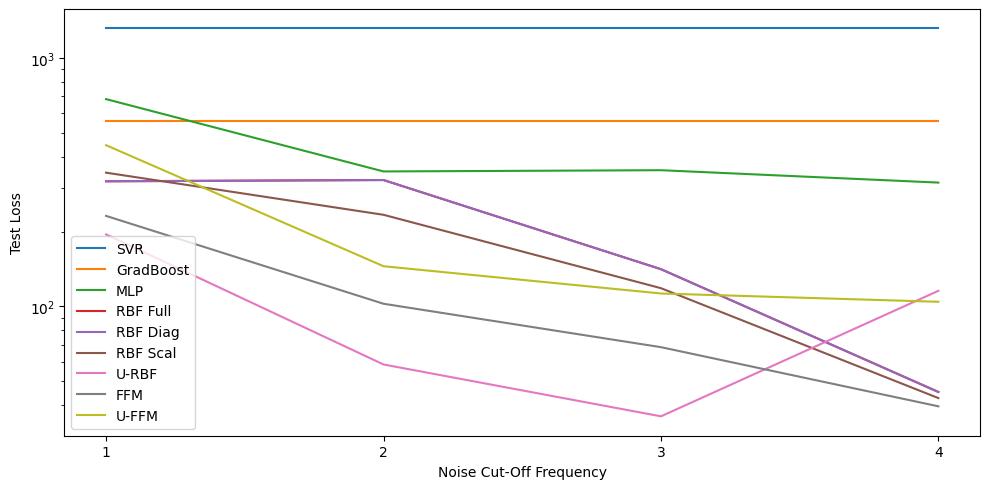

method,SVR,GradBoost,MLP,RBF Full,RBF Diag,RBF Scal,U-RBF,FFM,U-FFM
index,,,,,,,,,
1,1315.231675,556.833245,682.918896,318.832735,318.832735,345.357183,194.907413,231.357248,445.571697
2,1315.231675,556.833245,349.306461,322.605421,322.605421,233.735588,58.374055,102.488711,145.113794
3,1315.231675,556.833245,353.342649,141.185256,141.185256,118.389984,36.099507,68.532252,112.703402
4,1315.231675,556.833245,315.035174,45.239377,45.239377,42.750982,115.535089,39.606989,104.366780


In [3]:

renamed_experiments_df = condensed_experiments_df.copy()

method_renaming = {
    "svr": "SVR",
    #"pls": "PLS",
    "gradboost": "GradBoost",
    "mlp": "MLP",
    "rbf_full": "RBF Full",
    "rbf_diag": "RBF Diag",
    "rbf_scal": "RBF Scal",
    "rbf_univ": "U-RBF",
    "ffn": "FFM",
    "uffn": "U-FFM",
}

## rename the methods and exclude methods whose names are not in the method_renaming dict

renamed_experiments_df = renamed_experiments_df.rename(columns=method_renaming)
renamed_experiments_df = renamed_experiments_df[method_renaming.values()]


## plot the results in a line plot

plt.figure(figsize=(10,5))
plt.plot(renamed_experiments_df)
plt.legend(renamed_experiments_df.columns)
plt.xlabel("Noise Cut-Off Frequency")
plt.ylabel("Test Loss")

# scale the y-axis to log

plt.yscale("log")

plt.tight_layout()
plt.show()


renamed_experiments_df